<a href="https://colab.research.google.com/github/sylviayanz/2023-Predictive-Analytics/blob/main/Diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

#Task 2b: Import the Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle

sns.set()

#Task 3: Load the Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sylviayanz/2023-Predictive-Analytics/main/diamonds%20-%20diamonds.csv')


#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Get Data Info

In [4]:
data.info()

#cut, color and clarity are object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#Find Missing Values

#Task 5: Perform Data Cleaning

In [6]:
data.isnull().sum()
#no missing values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#Task 6: Visualize Cleaned up Dataset

<Axes: >

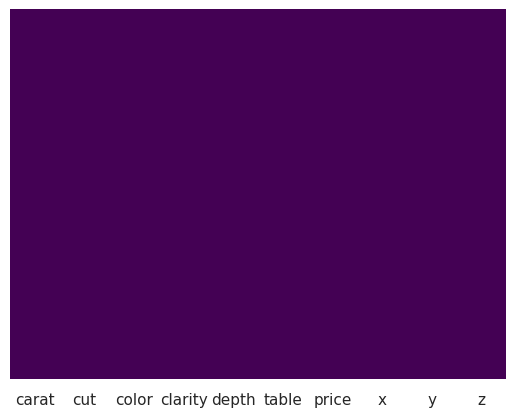

In [7]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


#Task 7: Conceptualize the problem

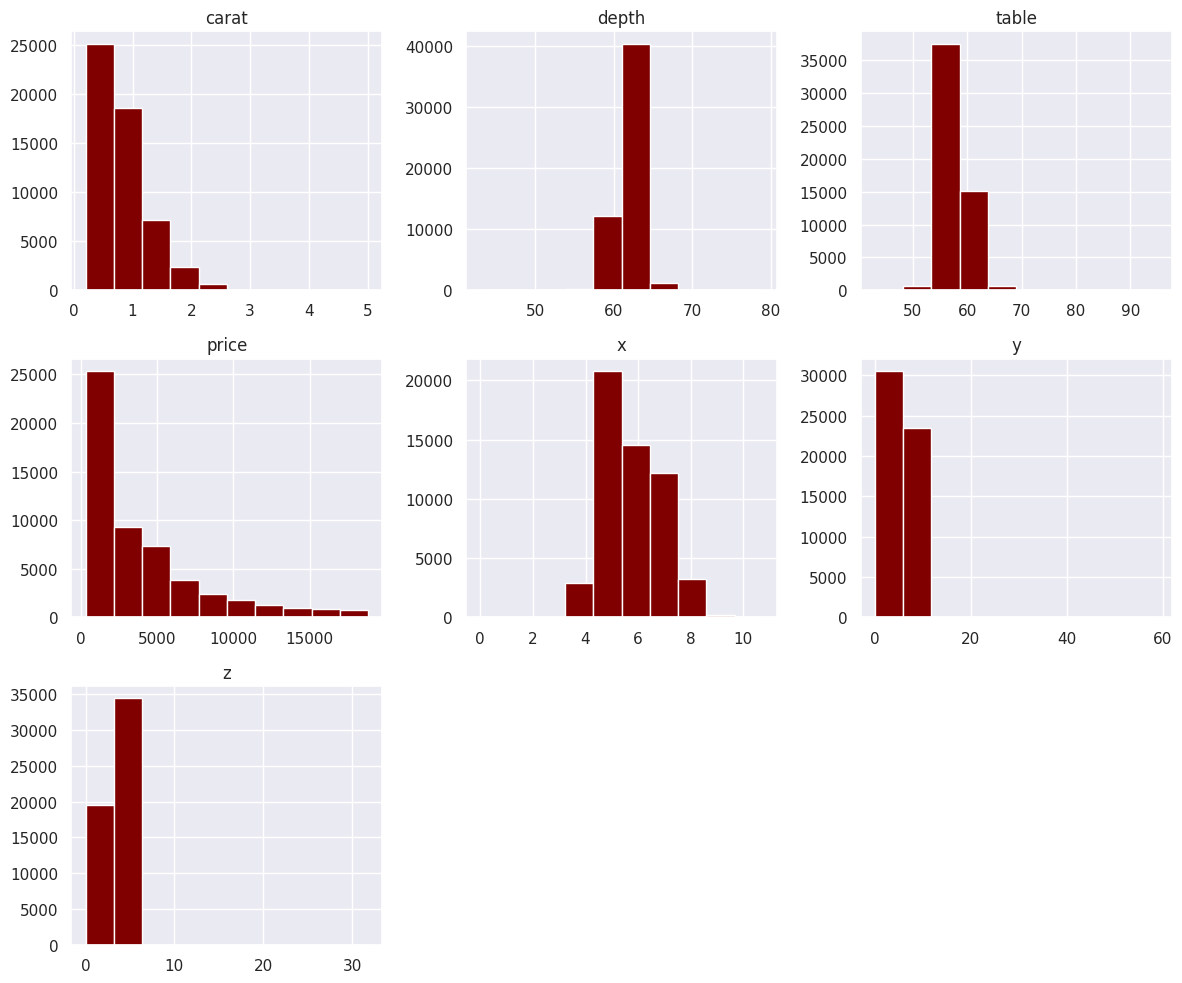

In [8]:
# Histograms--the distribution of all numeric variables
data.hist(figsize=(12, 10), color='maroon')
plt.tight_layout()
plt.show()

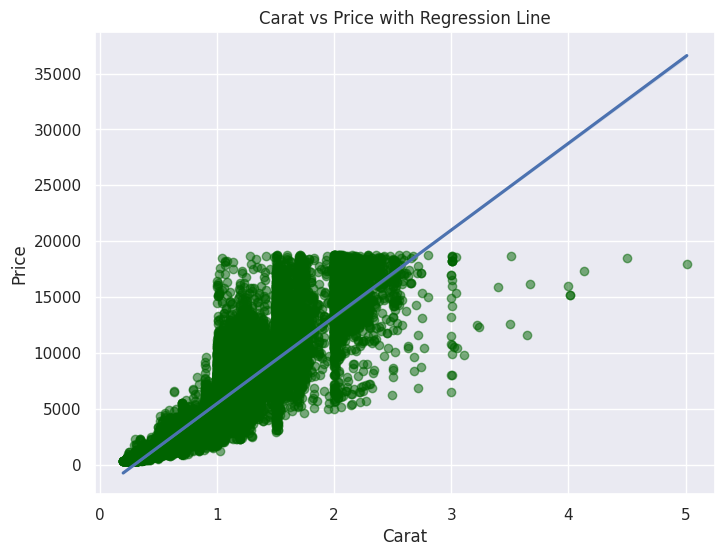

In [9]:
#Carat vs Price

plt.figure(figsize=(8, 6))
sns.regplot(x='carat', y='price', data=data, scatter_kws={'alpha':0.5, 'color':'darkgreen'})
plt.title('Carat vs Price with Regression Line')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

#a strong positive linear correlation between 'carat' and 'price'

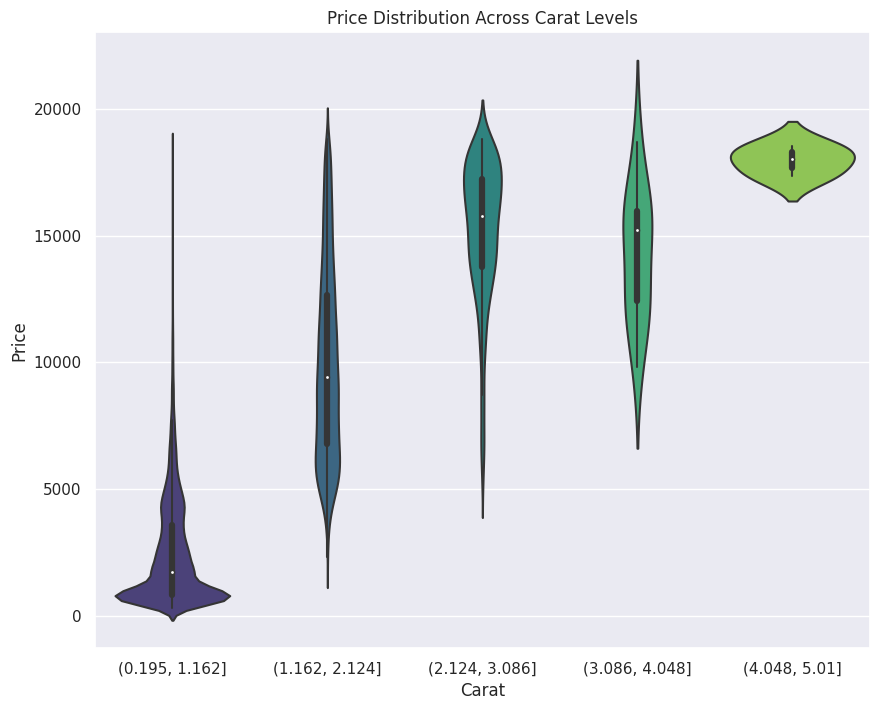

In [10]:
#Let's see the price distribution cross carat levels by violin plot
data['carat_bins'] = pd.cut(data['carat'], bins=5)  # Split 'carat' into 5 bins

plt.figure(figsize=(10, 8))
sns.violinplot(x='carat_bins', y='price', data=data, palette='viridis')
plt.title('Price Distribution Across Carat Levels')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

#basically, higher carat levels get higher price

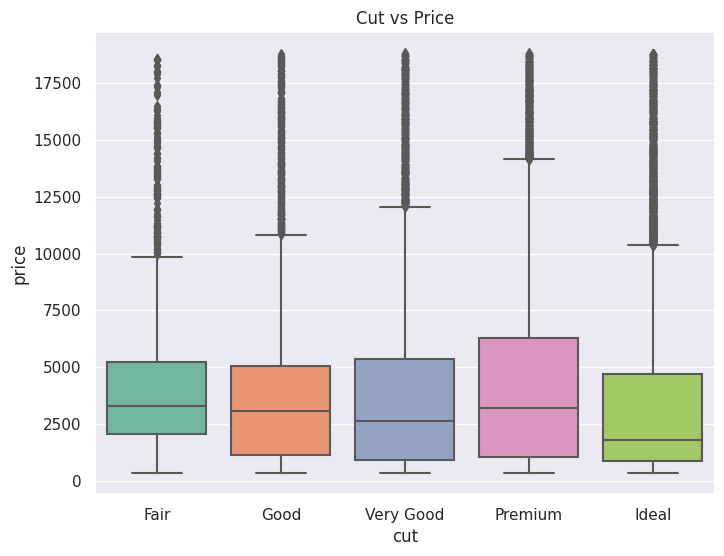

In [11]:
# Box plot - Cut vs Price
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='cut', y='price', order = cut_order, palette = 'Set2')
plt.title('Cut vs Price')
plt.show()

#color palette: https://matplotlib.org/stable/users/explain/colors/colormaps.html

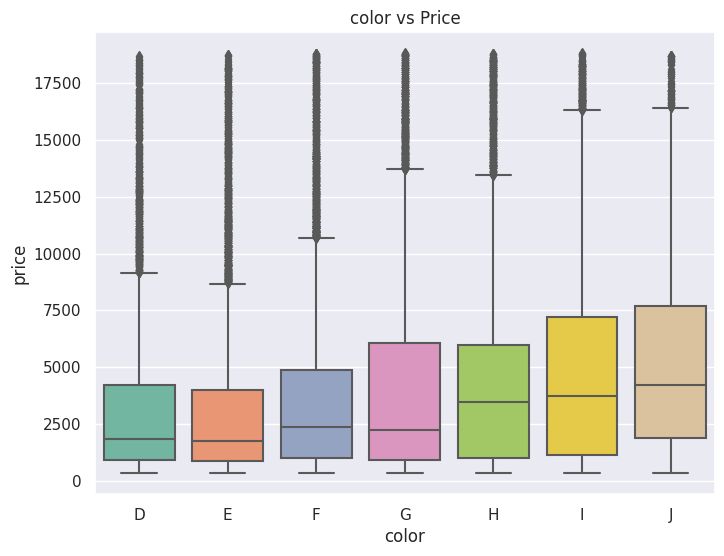

In [12]:
# Box plot - color vs Price

color_order = ['D', 'E', 'F', 'G', 'H', 'I','J']

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='color', y='price',order = color_order, palette = 'Set2')
plt.title('color vs Price')
plt.show()

<ipython-input-13-cd6f46487cfa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')


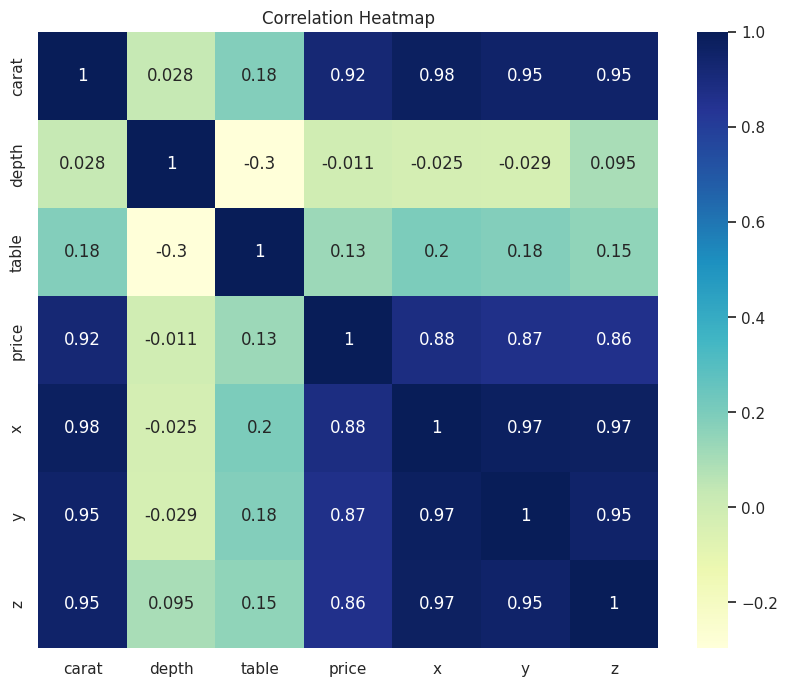

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

#price has positive correlation with carat, x, y,z. Especially, strong positive correlation with carart.

In [14]:
data['price'].max()

18823

In [15]:
data['price'].min()

326

In [16]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [17]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [18]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [19]:
#one-hot encoding for convert cut, color and clarity columns to new binary columns
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], prefix=['cut', 'color', 'clarity'])

In [20]:
data.head()

,carat,depth,table,price,x,y,z,carat_bins,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,"(0.195, 1.162]",0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,"(0.195, 1.162]",0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,"(0.195, 1.162]",0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,"(0.195, 1.162]",0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,"(0.195, 1.162]",0,1,...,0,1,0,0,0,1,0,0,0,0


In [21]:
data.drop('carat_bins', axis=1, inplace=True)

#Task 8: Perform Data-Split

In [22]:
from sklearn.model_selection import train_test_split

# Features: All columns except 'price'
X = data.drop('price', axis=1)

# Target variable: 'price'
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#the shape of the data
print(f'The shape of the data is: \nX_train: \t{X_train.shape} \nX_test: \t{X_test.shape} \ny_train: \t{y_train.shape} \ny_test: \t{y_test.shape}')

The shape of the data is: 
X_train: 	(43152, 26) 
X_test: 	(10788, 26) 
y_train: 	(43152,) 
y_test: 	(10788,)


#Task 9: Choose the ML Method to follow

In [24]:
#model selection

LinearRegression_model = LinearRegression()
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
XGBRegressor_model = XGBRegressor()

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 26546 to 15795
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          43152 non-null  float64
 1   depth          43152 non-null  float64
 2   table          43152 non-null  float64
 3   x              43152 non-null  float64
 4   y              43152 non-null  float64
 5   z              43152 non-null  float64
 6   cut_Fair       43152 non-null  uint8  
 7   cut_Good       43152 non-null  uint8  
 8   cut_Ideal      43152 non-null  uint8  
 9   cut_Premium    43152 non-null  uint8  
 10  cut_Very Good  43152 non-null  uint8  
 11  color_D        43152 non-null  uint8  
 12  color_E        43152 non-null  uint8  
 13  color_F        43152 non-null  uint8  
 14  color_G        43152 non-null  uint8  
 15  color_H        43152 non-null  uint8  
 16  color_I        43152 non-null  uint8  
 17  color_J        43152 non-null  uint8  
 18  cl

#Task 10: Train the ML Model

In [26]:
#train multiple models

models = [
    ('Linear Regression', LinearRegression_model),
    ('Decision Tree', DecisionTree_model),
    ('Random Forest', RandomForest_model),
    ('XGBoost', XGBRegressor_model)
]

for name, model in models:
    model.fit(X_train, y_train)
    print(f'{name} model is trained!')


Linear Regression model is trained!
Decision Tree model is trained!
Random Forest model is trained!
XGBoost model is trained!


In [27]:
# calculating the accuracy scores for each of the models

accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_XGBoost = XGBRegressor_model.score(X_test, y_test)

In [28]:
#Accuracy Calculation

models = {'LinearRegression_model': accuracy_LinearRegression, 'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest,
          'XGBRegressor_model': accuracy_XGBoost}

# a loop that iterates over the items in the models dictionary
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

The accuracy score for the LinearRegression_model is 91.89%
The accuracy score for the DecisionTree_model is 96.51%
The accuracy score for the RandomForest_model is 98.09%
The accuracy score for the XGBRegressor_model is 98.0%


**Based on the accuracy scores above, all the models got score higher than 90%, and RandomForest_model appears to have the highest accuracy, followed closely by XGBRegressor_model. Let's do the test and see how it works.**


#Task 11: Test the Model

In [29]:
mdl_file5 = '/content/drive/MyDrive/LaGuardia Class/assignment'

In [30]:
# Save the trained model to a file named 'mdl_file5'

with open('mdl_file5', 'wb') as file:
  model = pickle.dump(RandomForest_model, file)


In [31]:
data.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [32]:
#create an array

test_x = np.zeros((1, 26))
test_x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
#take loc[2] as test

data.loc[2]

carat              0.23
depth             56.90
table             65.00
price            327.00
x                  4.05
y                  4.07
z                  2.31
cut_Fair           0.00
cut_Good           1.00
cut_Ideal          0.00
cut_Premium        0.00
cut_Very Good      0.00
color_D            0.00
color_E            1.00
color_F            0.00
color_G            0.00
color_H            0.00
color_I            0.00
color_J            0.00
clarity_I1         0.00
clarity_IF         0.00
clarity_SI1        0.00
clarity_SI2        0.00
clarity_VS1        1.00
clarity_VS2        0.00
clarity_VVS1       0.00
clarity_VVS2       0.00
Name: 2, dtype: float64

In [34]:
test_x = np.zeros((1, 26))

test_x[0, 0] = 0.23     # carat
test_x[0, 1] = 56.90    # depth
test_x[0, 2] = 65.00    # table
test_x[0, 3] = 4.05     # x
test_x[0, 4] = 4.07     # y
test_x[0, 5] = 2.31     # z
test_x[0, 6] = 0.00     # cut_Fair
test_x[0, 7] = 1.00     # cut_Good
test_x[0, 8] = 0.00     # cut_Ideal
test_x[0, 9] = 0.00     # cut_Premium
test_x[0, 10] = 0.00    # cut_Very Good
test_x[0, 11] = 0.00    # color_D
test_x[0, 12] = 1.00    # color_E
test_x[0, 13] = 0.00    # color_F
test_x[0, 14] = 0.00    # color_G
test_x[0, 15] = 0.00    # color_H
test_x[0, 16] = 0.00    # color_I
test_x[0, 17] = 0.00    # color_J
test_x[0, 18] = 0.00    # clarity_I1
test_x[0, 19] = 0.00    # clarity_IF
test_x[0, 20] = 0.00    # clarity_SI1
test_x[0, 21] = 0.00    # clarity_SI2
test_x[0, 22] = 1.00    # clarity_VS1
test_x[0, 23] = 0.00    # clarity_VS2
test_x[0, 24] = 0.00    # clarity_VVS1
test_x[0, 25] = 0.00    # clarity_VVS2
test_x

array([[ 0.23, 56.9 , 65.  ,  4.05,  4.07,  2.31,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ]])

In [35]:
prediction = RandomForest_model.predict(test_x)
round(float(prediction[0]), 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


355.25

**That's not the correct answer, but close to it.**

In [36]:
#Let's predict the price in 4 models

models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]

In [37]:
for model in models:
    prediction = model.predict(test_x)  #For each model, use the predict method to make a prediction based on the test_x input.
    print(f'The model {model} predicts the diamond price as: {round(float(prediction[0]), 2)}')

The model LinearRegression() predicts the diamond price as: 198.07
The model DecisionTreeRegressor() predicts the diamond price as: 327.0
The model RandomForestRegressor() predicts the diamond price as: 355.25
The model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) predicts the diamond price as: 36

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Based on this single prediction, the Decision Tree model seems to be the most accurate. However, it's important to note that the performance of a model on a single prediction may not necessarily reflect its overall performance on a larger dataset.

To make a more informed decision, we should evaluate the models on a broader range of data and possibly use techniques like cross-validation to assess their performance. Additionally, consider other evaluation metrics besides just accuracy, such as mean squared error or R-squared, depending on the specific goals of our modeling task.

**Let's do another test**

In [38]:
data.loc[10]

carat              0.30
depth             64.00
table             55.00
price            339.00
x                  4.25
y                  4.28
z                  2.73
cut_Fair           0.00
cut_Good           1.00
cut_Ideal          0.00
cut_Premium        0.00
cut_Very Good      0.00
color_D            0.00
color_E            0.00
color_F            0.00
color_G            0.00
color_H            0.00
color_I            0.00
color_J            1.00
clarity_I1         0.00
clarity_IF         0.00
clarity_SI1        1.00
clarity_SI2        0.00
clarity_VS1        0.00
clarity_VS2        0.00
clarity_VVS1       0.00
clarity_VVS2       0.00
Name: 10, dtype: float64

In [39]:
#data.loc[10] --> price: 339

test_x = np.zeros((1, 26))

test_x[0, 0] = 0.30     # carat
test_x[0, 1] = 64.00    # depth
test_x[0, 2] = 55.00    # table
test_x[0, 3] = 4.25     # x
test_x[0, 4] = 4.28     # y
test_x[0, 5] = 2.73     # z
test_x[0, 6] = 0.00     # cut_Fair
test_x[0, 7] = 1.00     # cut_Good
test_x[0, 8] = 0.00     # cut_Ideal
test_x[0, 9] = 0.00     # cut_Premium
test_x[0, 10] = 0.00    # cut_Very Good
test_x[0, 11] = 0.00    # color_D
test_x[0, 12] = 0.00    # color_E
test_x[0, 13] = 0.00    # color_F
test_x[0, 14] = 0.00    # color_G
test_x[0, 15] = 0.00    # color_H
test_x[0, 16] = 0.00    # color_I
test_x[0, 17] = 1.00    # color_J
test_x[0, 18] = 0.00    # clarity_I1
test_x[0, 19] = 0.00    # clarity_IF
test_x[0, 20] = 1.00    # clarity_SI1
test_x[0, 21] = 0.00    # clarity_SI2
test_x[0, 22] = 0.00    # clarity_VS1
test_x[0, 23] = 0.00    # clarity_VS2
test_x[0, 24] = 0.00    # clarity_VVS1
test_x[0, 25] = 0.00    # clarity_VVS2
test_x

array([[ 0.3 , 64.  , 55.  ,  4.25,  4.28,  2.73,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [40]:
#predict the target variable based on the features in test_x.
#The prediction is stored in the variable prediction.

for model in models:
    prediction = model.predict(test_x)  #For each model, use the predict method to make a prediction based on the test_x input.
    print(f'The model {model} predicts the diamond price as ${round(float(prediction[0]), 2)}')  #This calculates the predicted diamond price, rounds it to two decimal places, and converts it to a float.


The model LinearRegression() predicts the diamond price as $-2484.4
The model DecisionTreeRegressor() predicts the diamond price as $339.0
The model RandomForestRegressor() predicts the diamond price as $354.85
The model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) predicts the diamond price as $3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Decision Tree still got the correct answer, I would like to choose Decision Tree Model:**

The Decision Tree model was chosen for predicting diamond prices due to its inherent ability to capture complex, non-linear relationships present in the data.

Unlike Linear Regression, which assumes linear patterns, diamonds' pricing involves intricate interactions among various attributes like carat, cut, and clarity etc. Decision Trees excel at capturing these intricate relationships, offering a more nuanced understanding of how different factors influence diamond prices.

In [41]:
mdl_file_v6 = '/content/drive/MyDrive/LaGuardia Class/assignment'

In [42]:
decision_tree_model = '/content/drive/MyDrive/LaGuardia Class/assignment/decision_tree.pkl'

In [43]:
import pickle
with open('decision_tree_model', 'wb') as file:
    model = pickle.dump(DecisionTree_model, file)


In [44]:
test_x = np.zeros((1, 26))

test_x[0, 0] = 0.30     # carat
test_x[0, 1] = 64.00    # depth
test_x[0, 2] = 55.00    # table
test_x[0, 3] = 4.25     # x
test_x[0, 4] = 4.28     # y
test_x[0, 5] = 2.73     # z
test_x[0, 6] = 0.00     # cut_Fair
test_x[0, 7] = 1.00     # cut_Good
test_x[0, 8] = 0.00     # cut_Ideal
test_x[0, 9] = 0.00     # cut_Premium
test_x[0, 10] = 0.00    # cut_Very Good
test_x[0, 11] = 0.00    # color_D
test_x[0, 12] = 0.00    # color_E
test_x[0, 13] = 0.00    # color_F
test_x[0, 14] = 0.00    # color_G
test_x[0, 15] = 0.00    # color_H
test_x[0, 16] = 0.00    # color_I
test_x[0, 17] = 1.00    # color_J
test_x[0, 18] = 0.00    # clarity_I1
test_x[0, 19] = 0.00    # clarity_IF
test_x[0, 20] = 1.00    # clarity_SI1
test_x[0, 21] = 0.00    # clarity_SI2
test_x[0, 22] = 0.00    # clarity_VS1
test_x[0, 23] = 0.00    # clarity_VS2
test_x[0, 24] = 0.00    # clarity_VVS1
test_x[0, 25] = 0.00    # clarity_VVS2
test_x

array([[ 0.3 , 64.  , 55.  ,  4.25,  4.28,  2.73,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [48]:
prediction = model.predict(test_x)
round(float(prediction[0]), 2)

1/1 [==============================] - 2s 2s/step


1.6

##Part 2

In [46]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
#defining a neural network model using the Keras library, specifically using the Sequential model.
model = Sequential()

#input layer
model.add(Dense(25, input_dim = X.shape[1], activation = 'relu'))
#Dense layer with 25 neurons,
# expecting an input dimension equal to the number of features in your data (x.shape[1]).
#The activation function used here is Rectified Linear Unit (ReLU).

#Hidden Layer:
model.add(Dense(10, activation = 'relu'))
#Dense layer with 10 neurons and ReLU activation function.

#Output Layer:
model.add(Dense(1))

In [50]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [51]:
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)


In [52]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = [monitor], verbose = 2, epochs = 1000)

Epoch 1/1000
1349/1349 - 8s - loss: 18761052.0000 - val_loss: 14437100.0000 - 8s/epoch - 6ms/step
Epoch 2/1000
1349/1349 - 4s - loss: 13315016.0000 - val_loss: 11678688.0000 - 4s/epoch - 3ms/step
Epoch 3/1000
1349/1349 - 4s - loss: 9200322.0000 - val_loss: 6293450.0000 - 4s/epoch - 3ms/step
Epoch 4/1000
1349/1349 - 5s - loss: 4566241.0000 - val_loss: 3300816.2500 - 5s/epoch - 3ms/step
Epoch 5/1000
1349/1349 - 5s - loss: 2860632.7500 - val_loss: 2247203.7500 - 5s/epoch - 4ms/step
Epoch 6/1000
1349/1349 - 4s - loss: 2064314.8750 - val_loss: 1691950.2500 - 4s/epoch - 3ms/step
Epoch 7/1000
1349/1349 - 4s - loss: 1641891.8750 - val_loss: 1324793.6250 - 4s/epoch - 3ms/step
Epoch 8/1000
1349/1349 - 5s - loss: 1401664.8750 - val_loss: 1138717.3750 - 5s/epoch - 4ms/step
Epoch 9/1000
1349/1349 - 4s - loss: 1247451.5000 - val_loss: 1007999.0000 - 4s/epoch - 3ms/step
Epoch 10/1000
1349/1349 - 4s - loss: 1150208.5000 - val_loss: 919712.2500 - 4s/epoch - 3ms/step
Epoch 11/1000
1349/1349 - 5s - loss:

In [53]:
prediction = model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(prediction, y_test))
print(f'After training the score is: {score}')

338/338 [==============================] - 1s 2ms/step
After training the score is: 620.9844693376593


In [54]:
col = [x for x in data.columns if x not in ('price')]

# Normal loop way
print('{')
for i, name in enumerate(col):
    print(f'"{name}":{{"min":{data[name].min()}, "max":{data[name].max()}}}{"," if i < (len(col)-1) else ""}')
print('}')

{
"carat":{"min":0.2, "max":5.01},
"depth":{"min":43.0, "max":79.0},
"table":{"min":43.0, "max":95.0},
"x":{"min":0.0, "max":10.74},
"y":{"min":0.0, "max":58.9},
"z":{"min":0.0, "max":31.8},
"cut_Fair":{"min":0, "max":1},
"cut_Good":{"min":0, "max":1},
"cut_Ideal":{"min":0, "max":1},
"cut_Premium":{"min":0, "max":1},
"cut_Very Good":{"min":0, "max":1},
"color_D":{"min":0, "max":1},
"color_E":{"min":0, "max":1},
"color_F":{"min":0, "max":1},
"color_G":{"min":0, "max":1},
"color_H":{"min":0, "max":1},
"color_I":{"min":0, "max":1},
"color_J":{"min":0, "max":1},
"clarity_I1":{"min":0, "max":1},
"clarity_IF":{"min":0, "max":1},
"clarity_SI1":{"min":0, "max":1},
"clarity_SI2":{"min":0, "max":1},
"clarity_VS1":{"min":0, "max":1},
"clarity_VS2":{"min":0, "max":1},
"clarity_VVS1":{"min":0, "max":1},
"clarity_VVS2":{"min":0, "max":1}
}


In [55]:
model.save('diamond.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                675       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 946 (3.70 KB)
Trainable params: 946 (3.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


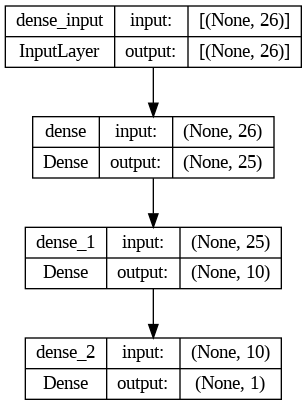

In [57]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [58]:
#data.loc[10]-->price = 339.0

test_x = np.zeros((1, 26))

test_x[0, 0] = 0.30     # carat
test_x[0, 1] = 64.00    # depth
test_x[0, 2] = 55.00    # table
test_x[0, 3] = 4.25     # x
test_x[0, 4] = 4.28     # y
test_x[0, 5] = 2.73     # z
test_x[0, 6] = 0.00     # cut_Fair
test_x[0, 7] = 1.00     # cut_Good
test_x[0, 8] = 0.00     # cut_Ideal
test_x[0, 9] = 0.00     # cut_Premium
test_x[0, 10] = 0.00    # cut_Very Good
test_x[0, 11] = 0.00    # color_D
test_x[0, 12] = 0.00    # color_E
test_x[0, 13] = 0.00    # color_F
test_x[0, 14] = 0.00    # color_G
test_x[0, 15] = 0.00    # color_H
test_x[0, 16] = 0.00    # color_I
test_x[0, 17] = 1.00    # color_J
test_x[0, 18] = 0.00    # clarity_I1
test_x[0, 19] = 0.00    # clarity_IF
test_x[0, 20] = 1.00    # clarity_SI1
test_x[0, 21] = 0.00    # clarity_SI2
test_x[0, 22] = 0.00    # clarity_VS1
test_x[0, 23] = 0.00    # clarity_VS2
test_x[0, 24] = 0.00    # clarity_VVS1
test_x[0, 25] = 0.00    # clarity_VVS2
test_x


array([[ 0.3 , 64.  , 55.  ,  4.25,  4.28,  2.73,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [59]:
prediction = model.predict(test_x)
round(float(prediction[0]), 2)

1/1 [==============================] - 0s 50ms/step


603.99